In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Plot the correlation matrix for LSSTY1 + DESI

In [2]:
# Get the rp bins:
rp_bin_c = np.loadtxt('../txtfiles/rp_bins_mid_plot_fixShapeNoise.txt')

In [3]:
print(rp_bin_c)

[ 1.83709466  2.42176242  3.19250463  4.20854074  5.54793718  7.31360558
  9.64120984 12.70958983 16.75450244 22.08673575 29.11598823 38.38234769
 50.59778848 66.70087562 87.92887875]


In [4]:
corr_Y1 = np.loadtxt('../txtfiles/sims_corr_myunits_wSN_Jun25_LSSTY1_fixShapeNoise.dat')

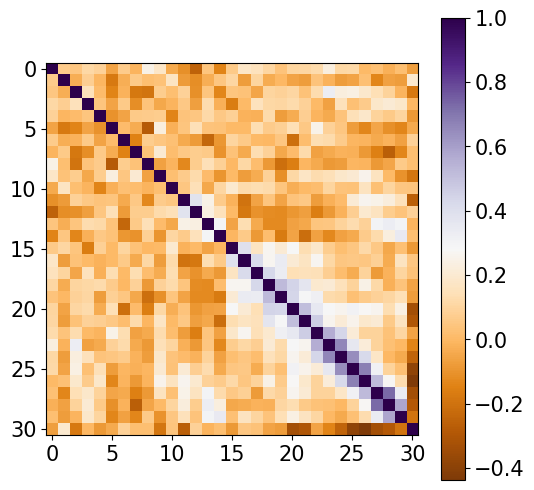

In [5]:
cmap=plt.get_cmap('PuOr')
plt.figure(figsize=[6,6])
plt.imshow(corr_Y1, cmap=cmap)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar2 = plt.colorbar()
cbar2.ax.tick_params(labelsize=15)
#plt.savefig('../plots/sims_corr_myunits_wSN_rp0=1.5_Y10.pdf')
plt.show()

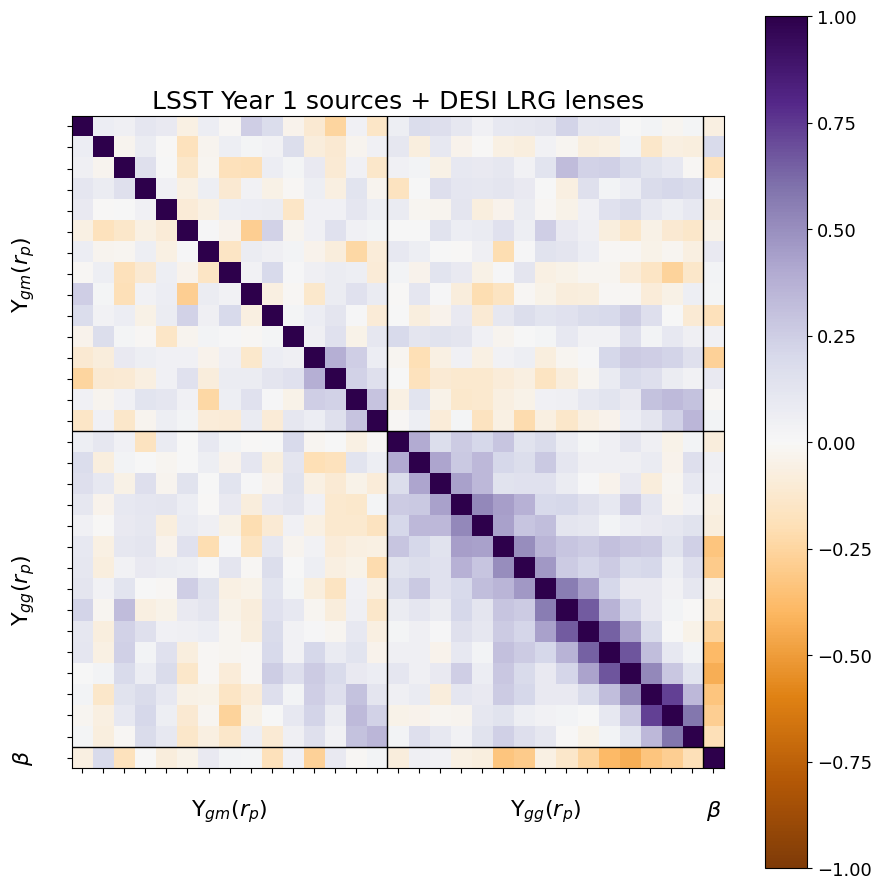

In [6]:
cmap = plt.get_cmap('PuOr')

# Quantity structure
bin_counts = [15, 15, 1]
labels_latex = [r'$\Upsilon_{gm}(r_p)$', r'$\Upsilon_{gg}(r_p)$', r'$\beta$']
group_positions = np.cumsum([0] + bin_counts)  # [0, 16, 32, 33]

# Tick positions only (no labels)
tick_positions = np.arange(sum(bin_counts))

# Plot
fig, ax = plt.subplots(figsize=(9, 9))
im = ax.imshow(corr_Y1, cmap=cmap, vmin=-1, vmax=1)

# Set ticks without labels
ax.set_xticks(tick_positions)
ax.set_yticks(tick_positions)
ax.set_xticklabels([''] * len(tick_positions), rotation=90, fontsize=11)
ax.set_yticklabels([''] * len(tick_positions), fontsize=11)

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13)

# Draw divider lines between groups
for i in range(1, len(group_positions) - 1):
    ax.axhline(group_positions[i] - 0.5, color='black', linewidth=1)
    ax.axvline(group_positions[i] - 0.5, color='black', linewidth=1)

# Add group labels on bottom and left, with larger font
for i, label in enumerate(labels_latex):
    start = group_positions[i]
    end = group_positions[i + 1]
    center = (start + end - 1) / 2
    ax.text(center, len(tick_positions) + 1.5, label,
            ha='center', va='center', fontsize=16, fontweight='bold')
    ax.text(-2.8, center, label,
            ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)

plt.title('LSST Year 1 sources + DESI LRG lenses', fontsize=18)
plt.tight_layout()
plt.savefig('../plots/LSSTY1_DESI_corrmat_fixShapeNoise.pdf')
plt.show()

In [7]:
cov_Y1 = np.loadtxt('../txtfiles/sims_cov_myunits_wSN_Jun25_LSSTY1.dat')
cov_Y10 = np.loadtxt('../txtfiles/sims_cov_myunits_wSN_Jun25_LSSTY10.dat')

In [9]:
print(np.amax(cov_Y1-cov_Y10))

0.0
